In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data
train=pd.read_csv(r"E:\evaluation\p12\Data_Train.csv")
test=pd.read_csv(r"E:\evaluation\p12\Test_set.csv")

In [3]:
#Check the rows and columns of train data 
train.shape

(10683, 11)

In [4]:
#Check the rows and columns of test data 
test.shape

(2671, 10)

In [5]:
#Check the top 5 rows of train data 
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
#Check the top 5 rows of test data 
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
#Check the null values in train dataset
train.isnull().sum()
#We have null values in Route and Total stops dataset 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Drop Null Column Values
train.dropna(inplace=True)


In [9]:
#Lets drop the duplicates
train.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
#Check the rows and columns size 
train.shape

(10682, 11)

In [11]:
# Formatting the Date of journey of train and test dataset
train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['weekday']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

test['Journey_Day'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_Month'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
test['weekday']= pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [12]:
#Dropping the date of journey column
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [13]:
#Checking the Train columns 
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

In [14]:
#Creating the duration function  
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train['Duration']=train['Duration'].apply(duration)
test['Duration']=test['Duration'].apply(duration)

In [15]:
#Creating the departtime function  
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train['Dep_Time']=train['Dep_Time'].apply(deparrtime)
test['Dep_Time']=test['Dep_Time'].apply(deparrtime)
train['Arrival_Time']=train['Arrival_Time'].apply(deparrtime)
test['Arrival_Time']=test['Arrival_Time'].apply(deparrtime)

In [16]:
#Creating function for stops
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train['Total_Stops']=train['Total_Stops'].apply(stops)
test['Total_Stops']=test['Total_Stops'].apply(stops)

In [17]:
#Assigning No Info on Additional info column on train dataset 
pd.options.mode.chained_assignment = None 
for i in range(train.shape[0]):
    if(train.iloc[i]['Additional_Info']=='No info'):
        train.iloc[i]['Additional_Info']='No Info' 

In [18]:
#Assigning No Info on Additional info column on test dataset 
pd.options.mode.chained_assignment = None 
for i in range(test.shape[0]):
    if(test.iloc[i]['Additional_Info']=='No info'):
        test.iloc[i]['Additional_Info']='No Info' 

In [20]:
train.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2


In [21]:
test.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,Evening,Night,655,1,No info,6,6,3
1,IndiGo,Kolkata,Banglore,Morning,Morning,240,1,No info,12,5,6


In [22]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airl

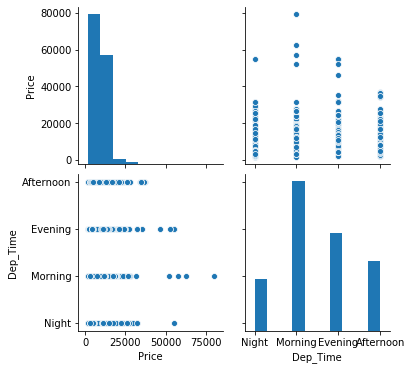

In [23]:
#Vislualizing Price with Dep Time 
sns.pairplot(data=train,vars=['Price','Dep_Time'])

In [24]:
#price outlier check
Q1=train['Price'].quantile(0.25)
Q3=train['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

5277.0
12373.0
7096.0


In [25]:
#price outlier removed
train=train[~((train['Price']>Q3+1.5*IQR)|(train['Price']<Q1-1.5*IQR))]

In [26]:
train.shape

(10588, 12)

In [27]:
train["Duration"] = train["Duration"].astype(int)
test["Duration"] = test["Duration"].astype(int)
train["Journey_Day"] = train["Journey_Day"].astype(object)
test["Journey_Day"] = test["Journey_Day"].astype(object)
train["Journey_Month"] = train["Journey_Month"].astype(object)
test["Journey_Month"] = test["Journey_Month"].astype(object)
train["weekday"] = train["weekday"].astype(object)
test["weekday"] = test["weekday"].astype(object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


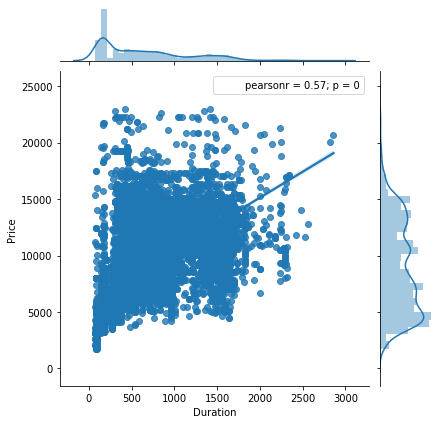

In [28]:
#Plottting Duration wrt price of flight
# 5000- 15000 can be seen as 
import scipy.stats as stats
_ = sns.jointplot(x='Duration',y='Price',data=train,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

In [29]:
# Import label encoder 
colnames = list(train.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if train[col].dtype==object:
        train[col]= label_encoder.fit_transform(train[col]) 

In [30]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,5,3897,8,0,6
1,1,3,0,2,0,445,2,5,7662,0,2,2
2,4,2,1,2,3,1140,2,5,13882,3,3,6
3,3,3,0,1,3,325,1,5,6218,4,2,6
4,3,0,5,1,3,285,1,5,13302,0,0,4


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10588 non-null  int32
 1   Source           10588 non-null  int32
 2   Destination      10588 non-null  int32
 3   Dep_Time         10588 non-null  int32
 4   Arrival_Time     10588 non-null  int32
 5   Duration         10588 non-null  int32
 6   Total_Stops      10588 non-null  int32
 7   Additional_Info  10588 non-null  int32
 8   Price            10588 non-null  int64
 9   Journey_Day      10588 non-null  int32
 10  Journey_Month    10588 non-null  int32
 11  weekday          10588 non-null  int32
dtypes: int32(11), int64(1)
memory usage: 620.4 KB


In [32]:
#Convert the different column datatype type to object
train["weekday"] = train["weekday"].astype(object)
train["Dep_Time"] = train["Dep_Time"].astype(object)
train["Airline"]=train["Airline"].astype(object)
train["Source"]=train["Source"].astype(object)
train["Destination"]=train["Destination"].astype(object)
train["Arrival_Time"]=train["Arrival_Time"].astype(object)
train["Total_Stops"]=train["Total_Stops"].astype(object)
train["Additional_Info"]=train["Additional_Info"].astype(object)
train["Journey_Day"]=train["Journey_Day"].astype(object)
train["Journey_Month"]=train["Journey_Month"].astype(object)

In [33]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,5,3897,8,0,6
1,1,3,0,2,0,445,2,5,7662,0,2,2
2,4,2,1,2,3,1140,2,5,13882,3,3,6
3,3,3,0,1,3,325,1,5,6218,4,2,6
4,3,0,5,1,3,285,1,5,13302,0,0,4


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10588 non-null  object
 1   Source           10588 non-null  object
 2   Destination      10588 non-null  object
 3   Dep_Time         10588 non-null  object
 4   Arrival_Time     10588 non-null  object
 5   Duration         10588 non-null  int32 
 6   Total_Stops      10588 non-null  object
 7   Additional_Info  10588 non-null  object
 8   Price            10588 non-null  int64 
 9   Journey_Day      10588 non-null  object
 10  Journey_Month    10588 non-null  object
 11  weekday          10588 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 1.0+ MB


In [35]:
#for test data
# Import label encoder 
colnames = list(test.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if test[col].dtype==object:
        test[col]= label_encoder.fit_transform(test[col])

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int32
 1   Source           2671 non-null   int32
 2   Destination      2671 non-null   int32
 3   Dep_Time         2671 non-null   int32
 4   Arrival_Time     2671 non-null   int32
 5   Duration         2671 non-null   int32
 6   Total_Stops      2671 non-null   int32
 7   Additional_Info  2671 non-null   int32
 8   Journey_Day      2671 non-null   int32
 9   Journey_Month    2671 non-null   int32
 10  weekday          2671 non-null   int32
dtypes: int32(11)
memory usage: 114.9 KB


In [37]:
#Convert the different column datatype type to object
test["weekday"] = test["weekday"].astype(object)
test["Dep_Time"] = test["Dep_Time"].astype(object)
test["Airline"]=test["Airline"].astype(object)
test["Source"]=test["Source"].astype(object)
test["Destination"]=test["Destination"].astype(object)
test["Arrival_Time"]=test["Arrival_Time"].astype(object)
test["Total_Stops"]=test["Total_Stops"].astype(object)
test["Additional_Info"]=test["Additional_Info"].astype(object)
test["Journey_Day"]=test["Journey_Day"].astype(object)
test["Journey_Month"]=test["Journey_Month"].astype(object)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Dep_Time         2671 non-null   object
 4   Arrival_Time     2671 non-null   object
 5   Duration         2671 non-null   int32 
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   Journey_Day      2671 non-null   object
 9   Journey_Month    2671 non-null   object
 10  weekday          2671 non-null   object
dtypes: int32(1), object(10)
memory usage: 219.2+ KB


In [39]:
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,4,2,1,1,3,655,1,5,2,3,3
1,3,3,0,2,2,240,1,5,4,2,6
2,4,2,1,1,1,1425,1,3,7,2,1
3,6,2,1,2,3,780,1,5,7,2,1
4,0,0,2,3,3,170,0,5,8,3,0


In [40]:
#Modelling
from sklearn import preprocessing

In [41]:
train["Duration"]= (train["Duration"] - train["Duration"].mean())/train["Duration"].std()   #standardizing
test["Duration"]= (test["Duration"] - test["Duration"].mean())/test["Duration"].std()

In [42]:
X=train.drop(["Price"],axis=1)
Y=train["Price"]
x=np.array(X)
y=np.array(Y)

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()

In [45]:
best_gbm = GridSearchCV(gbm, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=5, n_jobs=-1)
best_xgb = GridSearchCV(xgb, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=5, n_jobs=-1)


In [46]:
best_gbm.fit(x,y)
best_xgb.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
         

In [47]:
scores = cross_val_score(best_gbm.best_estimator_, x, y, cv=5)
print("GBM Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
scores = cross_val_score(best_xgb.best_estimator_, x, y, cv=5)
print("XGBoost Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

GBM Cross validation score: 87.59% (+/- 0.52%)
XGBoost Cross validation score: 87.48% (+/- 0.70%)


In [48]:
test=test.drop(['Airline', 'Source', 'Destination',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],axis=1)

In [49]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,-0.928366,0,5,3897,8,0,6
1,1,3,0,2,0,-0.387338,2,5,7662,0,2,2
2,4,2,1,2,3,0.979988,2,5,13882,3,3,6
3,3,3,0,1,3,-0.623423,1,5,6218,4,2,6
4,3,0,5,1,3,-0.702118,1,5,13302,0,0,4


In [50]:
test.head()

,Journey_Day,Journey_Month,weekday
0,2,3,3
1,4,2,6
2,7,2,1
3,7,2,1
4,8,3,0


In [52]:
#KNN
number_of_neighbors = range(1,20)
params = {'n_neighbors':number_of_neighbors}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5) 
model.fit(x,y)
scores = cross_val_score(model, x, y, cv=5)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

ValueError: Found input variables with inconsistent numbers of samples: [2671, 10588]

In [ ]:
#cannot find the solution of this error 